In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import os

data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.shape

(891, 12)

In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Revisión de valores nulos
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Existen valores nulos entonces se hace el procesamiento de estos valores

In [12]:
data = data.fillna(0)
# Revisión de valores nulos
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### Vamos a clasificar los datos como 'Survived' y 'Pclass' para usar en los arboles de decisión

In [13]:
# Clasificación de Supervivencia

def map_survivors(score):
    if score == 0:
        return 'NoSobrevivio'
    else:
        return 'Sobrevivio'
    
# Clasificación de Tiquetes

def map_passenger_class(pclass):
    if pclass == 1:
        return 'PrimeraClase'
    elif pclass == 2:
        return 'SegundaClase'
    else:
        return 'TerceraClase'
    
data['Survivor_score'] = data['Survived'].apply(map_survivors)
data['Passenger_class'] = data['Pclass'].apply(map_passenger_class)

data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survivor_score,Passenger_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,NoSobrevivio,TerceraClase
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Sobrevivio,PrimeraClase
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Sobrevivio,TerceraClase
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Sobrevivio,PrimeraClase
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,NoSobrevivio,TerceraClase


#### Las predicciones se van a realizar sobre el indice de supervivencia, la clase de pasajero y su edad.

In [17]:
# Filtrar datos que no tengan edad para no alterar el resultado
data_filtered = data[data['Age'] != 0]

predictors_col = ["Pclass", "Age"]
target_col = ["Survivor_score"]

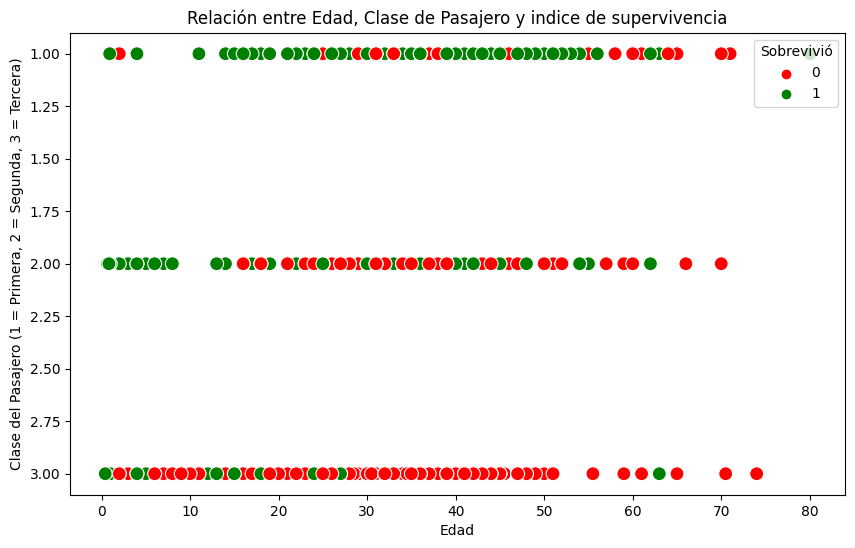

In [38]:
# Diagramar Dipersión de las 2 variables con mayor correlación
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=data_filtered,
    x='Age',
    y='Pclass',
    hue='Survived',
    palette={0: 'red', 1: 'green'},
    s=100  # marker size
)

# Reverse the order of the y-axis to have 1 at the top and 3 at the bottom
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Edad')
plt.ylabel('Clase del Pasajero (1 = Primera, 2 = Segunda, 3 = Tercera)')
plt.title('Relación entre Edad, Clase de Pasajero y indice de supervivencia')

# Display the plot
plt.legend(title='Sobrevivió', loc='upper right')
plt.show()

In [18]:
predictors = data_filtered[predictors_col]
target = data_filtered[target_col]

predictors

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
885,3,39.0
886,2,27.0
887,1,19.0
889,1,26.0


In [19]:
corr = predictors.corr()
corr

,Pclass,Age
Pclass,1.000000,-0.369226
Age,-0.369226,1.000000


In [31]:
# División de datos con proporcion de 30% de datos de test
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=13)

[Text(0.32305090206185566, 0.9722222222222222, 'x[0] <= 1.5\ngini = 0.479\nsamples = 499\nvalue = [301, 198]'),
 Text(0.125, 0.9166666666666666, 'x[1] <= 43.5\ngini = 0.432\nsamples = 127\nvalue = [40, 87]'),
 Text(0.03608247422680412, 0.8611111111111112, 'x[1] <= 18.5\ngini = 0.354\nsamples = 87\nvalue = [20, 67]'),
 Text(0.02577319587628866, 0.8055555555555556, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.04639175257731959, 0.8055555555555556, 'x[1] <= 20.0\ngini = 0.388\nsamples = 76\nvalue = [20, 56]'),
 Text(0.03608247422680412, 0.75, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.05670103092783505, 0.75, 'x[1] <= 24.5\ngini = 0.372\nsamples = 73\nvalue = [18, 55]'),
 Text(0.020618556701030927, 0.6944444444444444, 'x[1] <= 21.5\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.010309278350515464, 0.6388888888888888, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.030927835051546393, 0.6388888888888888, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0

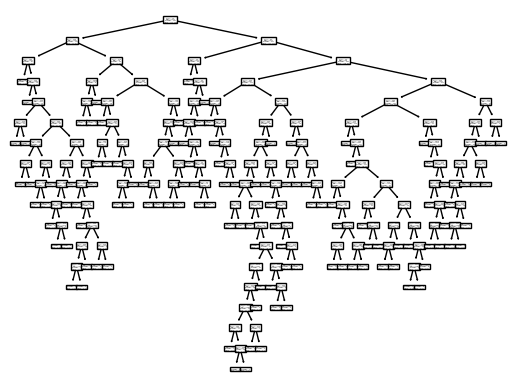

In [32]:
tree = DecisionTreeClassifier()
arbol = tree.fit(X_train, y_train)
plot_tree(arbol)

In [33]:
predicciones = arbol.predict(X_test)
predicciones

array(['Sobrevivio', 'NoSobrevivio', 'Sobrevivio', 'NoSobrevivio',
       'NoSobrevivio', 'NoSobrevivio', 'NoSobrevivio', 'NoSobrevivio',
       'NoSobrevivio', 'Sobrevivio', 'NoSobrevivio', 'NoSobrevivio',
       'NoSobrevivio', 'NoSobrevivio', 'NoSobrevivio', 'NoSobrevivio',
       'NoSobrevivio', 'NoSobrevivio', 'NoSobrevivio', 'NoSobrevivio',
       'NoSobrevivio', 'NoSobrevivio', 'Sobrevivio', 'NoSobrevivio',
       'NoSobrevivio', 'NoSobrevivio', 'NoSobrevivio', 'NoSobrevivio',
       'NoSobrevivio', 'Sobrevivio', 'NoSobrevivio', 'NoSobrevivio',
       'NoSobrevivio', 'NoSobrevivio', 'Sobrevivio', 'Sobrevivio',
       'NoSobrevivio', 'NoSobrevivio', 'NoSobrevivio', 'NoSobrevivio',
       'Sobrevivio', 'NoSobrevivio', 'NoSobrevivio', 'NoSobrevivio',
       'Sobrevivio', 'NoSobrevivio', 'NoSobrevivio', 'NoSobrevivio',
       'NoSobrevivio', 'NoSobrevivio', 'NoSobrevivio', 'NoSobrevivio',
       'Sobrevivio', 'NoSobrevivio', 'NoSobrevivio', 'NoSobrevivio',
       'Sobrevivio', 'Sobr

In [34]:
# Evaluar el modelo
print("Reporte de Clasificación:")
print(classification_report(y_test, predicciones))

# Calcular Precisión
accuracy = accuracy_score(y_test, predicciones)
print("Precisión:", accuracy)

Reporte de Clasificación:
              precision    recall  f1-score   support

NoSobrevivio       0.66      0.84      0.74       123
  Sobrevivio       0.66      0.41      0.51        92

    accuracy                           0.66       215
   macro avg       0.66      0.63      0.62       215
weighted avg       0.66      0.66      0.64       215

Precisión: 0.6558139534883721


In [35]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,NoSobrevivio,Sobrevivio
Actual,,
NoSobrevivio,103,20
Sobrevivio,54,38


## Analisis

### 1. Existe una relación entre la clase del pasajero y su indice de supervivencia, los pasajeros de primera clase tienden a tener mejores chances de sobrevivir que los pasajeros de segunda y tercera clase.

### 2. No hay correlación entre la edad y la clase del pasajero.

### 3. Se realiza el modelo predictivo con arboles de decisión con resultados mixtos con una precisión promedio del 65 ~ 66% aproximadamente y un recall en casos de no supervivencia del 84% y en casos de supervivencia del 41%, esto nos puede decir que el modelo tiene una mejor capacidad de predecir que pasajero no va a sobrevivir, mientras que se le dificulta predecir quien si va a sobrevivir, esto puede ser debido a la pobre correlación entre la edad y la clase del pasajero y la falta del dato de la edad en 177 de los 891 pasajeros.

### 4. Puede que el modelo predictivo de arboles de decisión no sea la mejor opción frente a los otros 2 métodos, por las razones vistas anteriormente.